# Prompt Usage Estimation
This notebook estimates the number of prompts sent over a subscription period.

Total conversations: 4339
Total prompts: 57664
conversation_id
                                       5
"AI Understanding Capability"          2
"Why pee on tombstone"\n               2
$20 Watch for Interviews               5
.NET Core vs Go vs Scala               2
                                      ..
urql: Add isHighlighted to Word        4
urql: Key Error Solution               1
useCallback memoizes changing props    7
useEffect Execution Order              6
ε-greedy random actions                7
Length: 4339, dtype: int64


/tmp/ipykernel_4571/4047600646.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


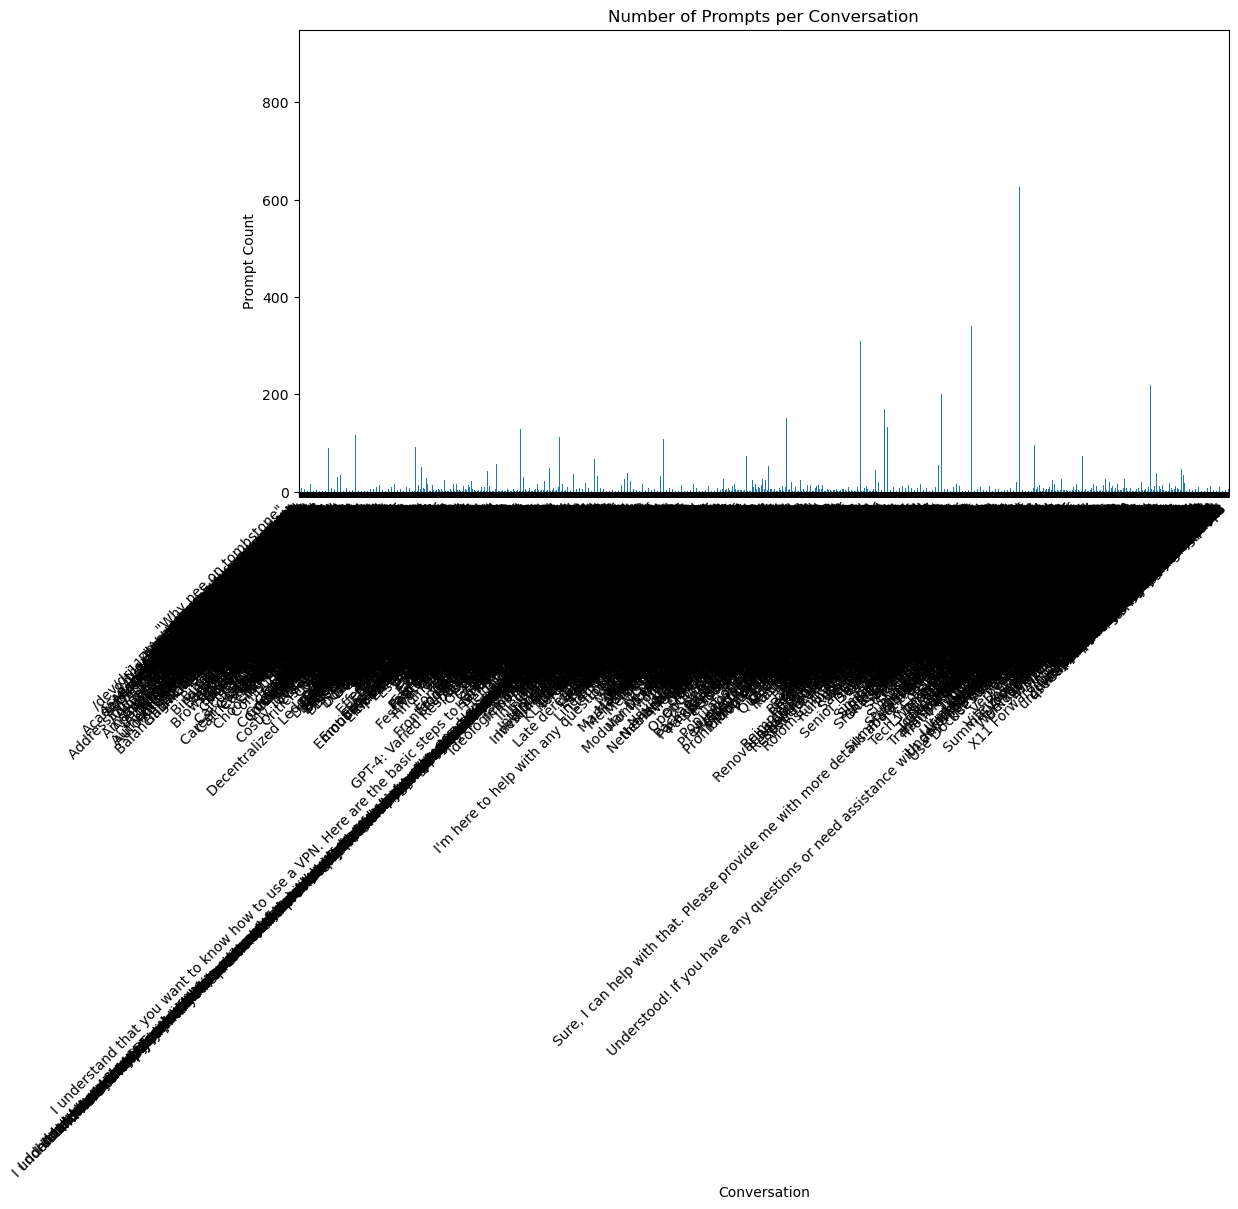

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from allPrompts import load_prompts

df = load_prompts("../assets/conversations.json")
print(df.head())

# Basic stats
total_conversations = df['conversation_id'].nunique()
total_prompts = len(df)
prompts_per_convo = df.groupby('conversation_id').size()

print(f"Total conversations: {total_conversations}")
print(f"Total prompts: {total_prompts}")
print(prompts_per_convo)

# Plot
plt.figure(figsize=(12, 6))
prompts_per_convo.plot(kind='bar')
plt.title("Number of Prompts per Conversation")
plt.xlabel("Conversation")
plt.ylabel("Prompt Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

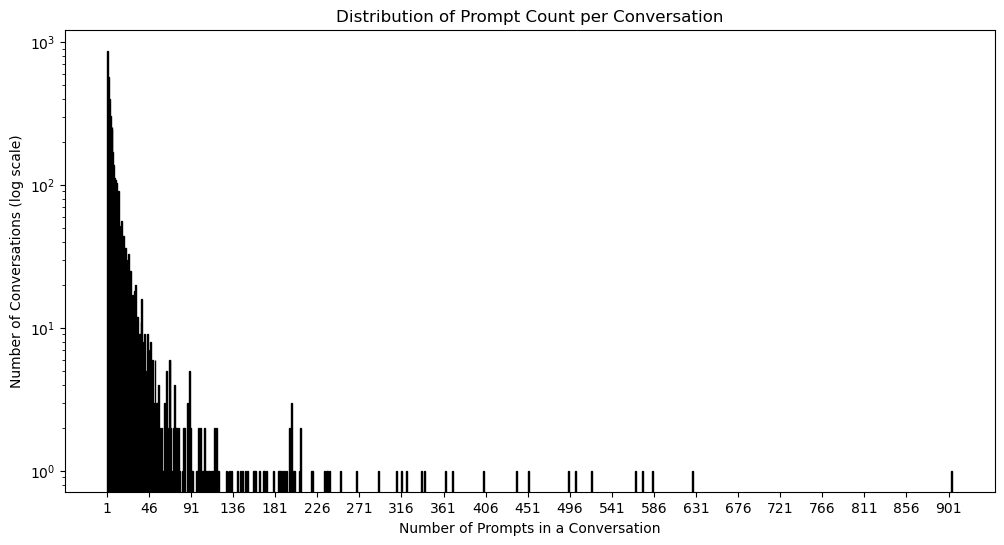

In [9]:
import matplotlib.pyplot as plt

# Count prompts per conversation
prompts_per_convo = df.groupby('conversation_id').size()

# Plot histogram with log scale
plt.figure(figsize=(12,6))
plt.hist(prompts_per_convo, bins=range(1, prompts_per_convo.max()+2), edgecolor='black')
plt.xlabel('Number of Prompts in a Conversation')
plt.ylabel('Number of Conversations (log scale)')
plt.title('Distribution of Prompt Count per Conversation')
plt.yscale('log')  # log scale for y-axis
plt.xticks(range(1, prompts_per_convo.max()+1, max(1, prompts_per_convo.max()//20)))
plt.show()